# First Project : Predictive Analytics

Nama : Alivia Vinca Kustaryono

Cohort ID : MC006D5X2041

Email : mc006d5x2041@student.devacademy.id

# Data Loading

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.pipeline import Pipeline
import joblib


In [1]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.4 MB/s eta 0:00:00


## Import Dataset

In [3]:
# Import module yang disediakan google colab untuk kebutuhan upload file
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mc006d5x2041","key":"9cbfefc7928603e51e693b7df8e126d6"}'}

In [4]:
# Download kaggle dataset and unzip the file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d litvinenko630/insurance-claims

Dataset URL: https://www.kaggle.com/datasets/litvinenko630/insurance-claims
License(s): apache-2.0
  0% 0.00/673k [00:00<?, ?B/s]
100% 673k/673k [00:00<00:00, 444MB/s]


In [6]:
!unzip insurance-claims.zip

Archive:  insurance-claims.zip
  inflating: Insurance claims data.csv  


In [7]:
insurance = pd.read_csv('Insurance claims data.csv')
insurance.head(20)

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,POL045360,9.3,1.2,41,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
1,POL016745,8.2,1.8,35,C2,27003,C1,M9,Diesel,200Nm@1750rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
2,POL007194,9.5,0.2,44,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
3,POL018146,5.2,0.4,44,C10,73430,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
4,POL049011,10.1,1.0,56,C13,5410,B2,M5,Diesel,200Nm@3000rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0
5,POL053680,3.1,2.0,36,C7,6112,B2,M7,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,0,0
6,POL053943,4.5,2.4,38,C2,27003,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
7,POL002857,10.7,2.0,56,C2,27003,B2,M6,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
8,POL028225,10.7,0.6,55,C5,34738,B1,M8,CNG,82.1Nm@3400rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,2,0
9,POL047631,0.3,2.4,45,C3,4076,B2,M6,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0


# Exploratory Data Analysis (EDA)

In [13]:
# melihat tipe data dan kolom data
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   subscription_length               58592 non-null  float64
 2   vehicle_age                       58592 non-null  float64
 3   customer_age                      58592 non-null  int64  
 4   region_code                       58592 non-null  object 
 5   region_density                    58592 non-null  int64  
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   max_torque                        58592 non-null  object 
 10  max_power                         58592 non-null  object 
 11  engine_type                       58592 non-null  object 
 12  airb

In [9]:
# Hitung Claim Status
jumlah = insurance['claim_status'].value_counts()
persentase = insurance['claim_status'].value_counts(normalize=True) * 100
hasil = pd.DataFrame({'Jumlah': jumlah, 'Persentase (%)': persentase.round(2)})
print(hasil)


              Jumlah  Persentase (%)
claim_status                        
0              54844            93.6
1               3748             6.4


In [15]:
# melihat data duplikat
insurance.duplicated().sum()

np.int64(0)

In [16]:
# melihat data hilang
insurance.isnull().sum()

,0
policy_id,0
subscription_length,0
vehicle_age,0
customer_age,0
region_code,0
region_density,0
segment,0
model,0
fuel_type,0
max_torque,0


In [14]:
# melihat fitur kategorik
insurance.describe()

,subscription_length,vehicle_age,customer_age,region_density,airbags,displacement,cylinder,turning_radius,length,width,gross_weight,ncap_rating,claim_status
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000
mean,6.111688,1.388473,44.823935,18826.858667,3.137066,1162.355851,3.626963,4.852893,3850.476891,1672.233667,1385.276813,1.759950,0.063968
std,4.142790,1.134413,6.935604,17660.174792,1.832641,266.304786,0.483616,0.228061,311.457119,112.089135,212.423085,1.389576,0.244698
min,0.000000,0.000000,35.000000,290.000000,1.000000,796.000000,3.000000,4.500000,3445.000000,1475.000000,1051.000000,0.000000,0.000000
25%,2.100000,0.400000,39.000000,6112.000000,2.000000,796.000000,3.000000,4.600000,3445.000000,1515.000000,1185.000000,0.000000,0.000000
50%,5.700000,1.200000,44.000000,8794.000000,2.000000,1197.000000,4.000000,4.800000,3845.000000,1735.000000,1335.000000,2.000000,0.000000
75%,10.400000,2.200000,49.000000,27003.000000,6.000000,1493.000000,4.000000,5.000000,3995.000000,1755.000000,1510.000000,3.000000,0.000000
max,14.000000,20.000000,75.000000,73430.000000,6.000000,1498.000000,4.000000,5.200000,4300.000000,1811.000000,1720.000000,5.000000,1.000000


### Visualisasi & Korelasi Data

In [17]:
#Korelasi Data Numerik
# Ambil hanya kolom numerik
numeric_cols = insurance.select_dtypes(include=[np.number]).columns

# Hitung korelasi
corr_matrix = insurance[numeric_cols].corr()

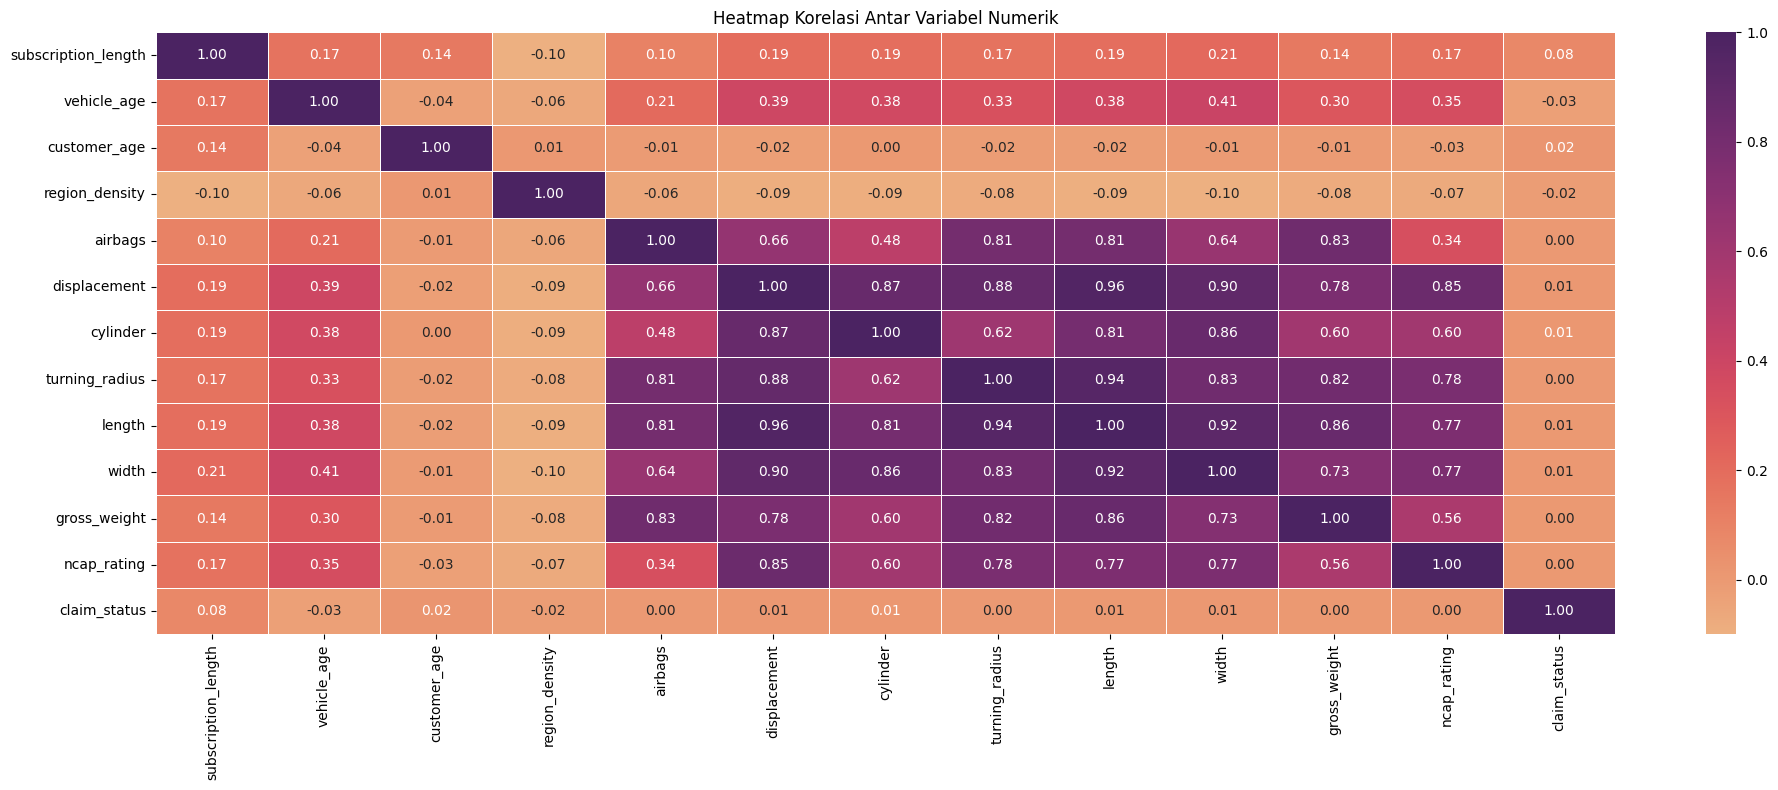

In [18]:
#Heatmap Korelasi
plt.figure(figsize=(20, 8))
sns.heatmap(corr_matrix, annot=True, cmap='flare', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi Antar Variabel Numerik')
plt.tight_layout()
plt.show()

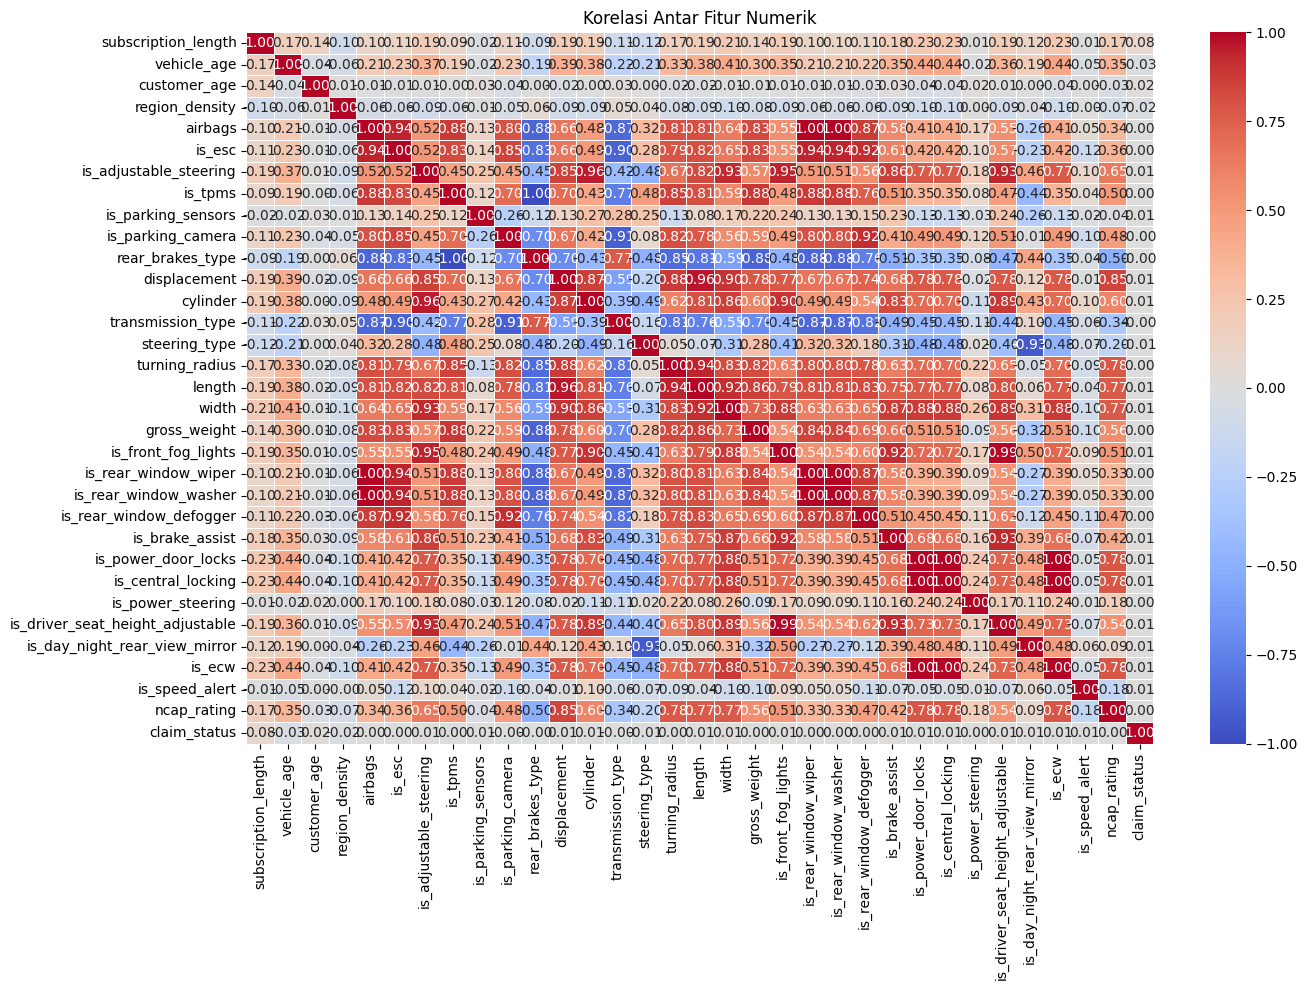

In [ ]:
# Heatmap Korelasi Setelah Preprocessing Data
# Pilih fitur numerik
numerical_features = insurance.select_dtypes(include=['int64', 'float64'])

# Korelasi
plt.figure(figsize=(14, 10))
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Korelasi Antar Fitur Numerik")
plt.tight_layout()
plt.show()


<ipython-input-19-006dce4f62dc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_corr.values, y=target_corr.index, palette='viridis')


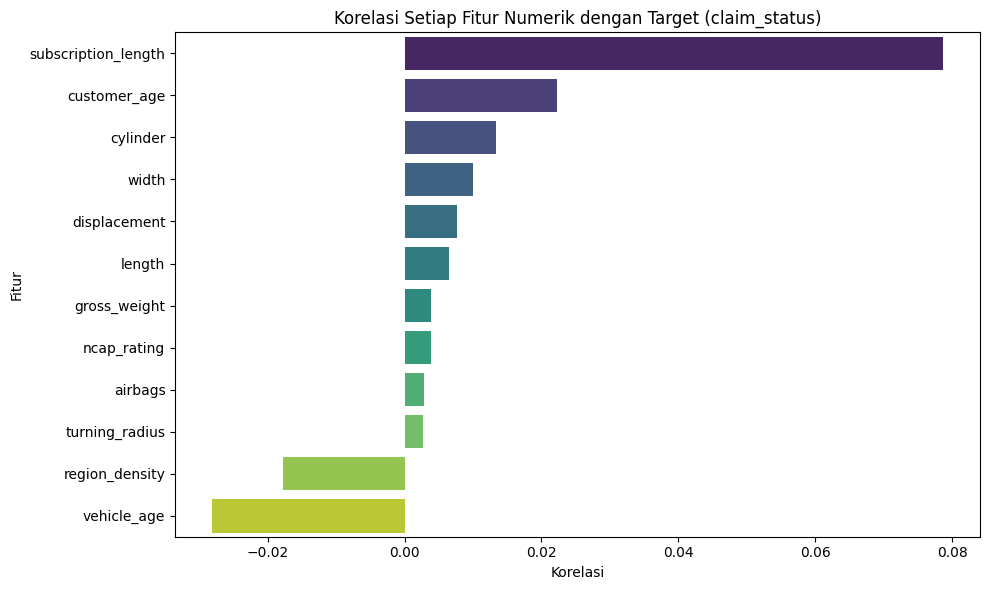

In [19]:
# Korelasi semua fitur numerik dengan target
target_corr = corr_matrix['claim_status'].drop('claim_status').sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=target_corr.values, y=target_corr.index, palette='viridis')
plt.title('Korelasi Setiap Fitur Numerik dengan Target (claim_status)')
plt.xlabel('Korelasi')
plt.ylabel('Fitur')
plt.tight_layout()
plt.show()


<ipython-input-24-058db739aa6a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=insurance, x=col, ax=ax, palette='Set2')
<ipython-input-24-058db739aa6a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=insurance, x=col, ax=ax, palette='Set2')
<ipython-input-24-058db739aa6a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=insurance, x=col, ax=ax, palette='Set2')
<ipython-input-24-058db739aa6a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` varia

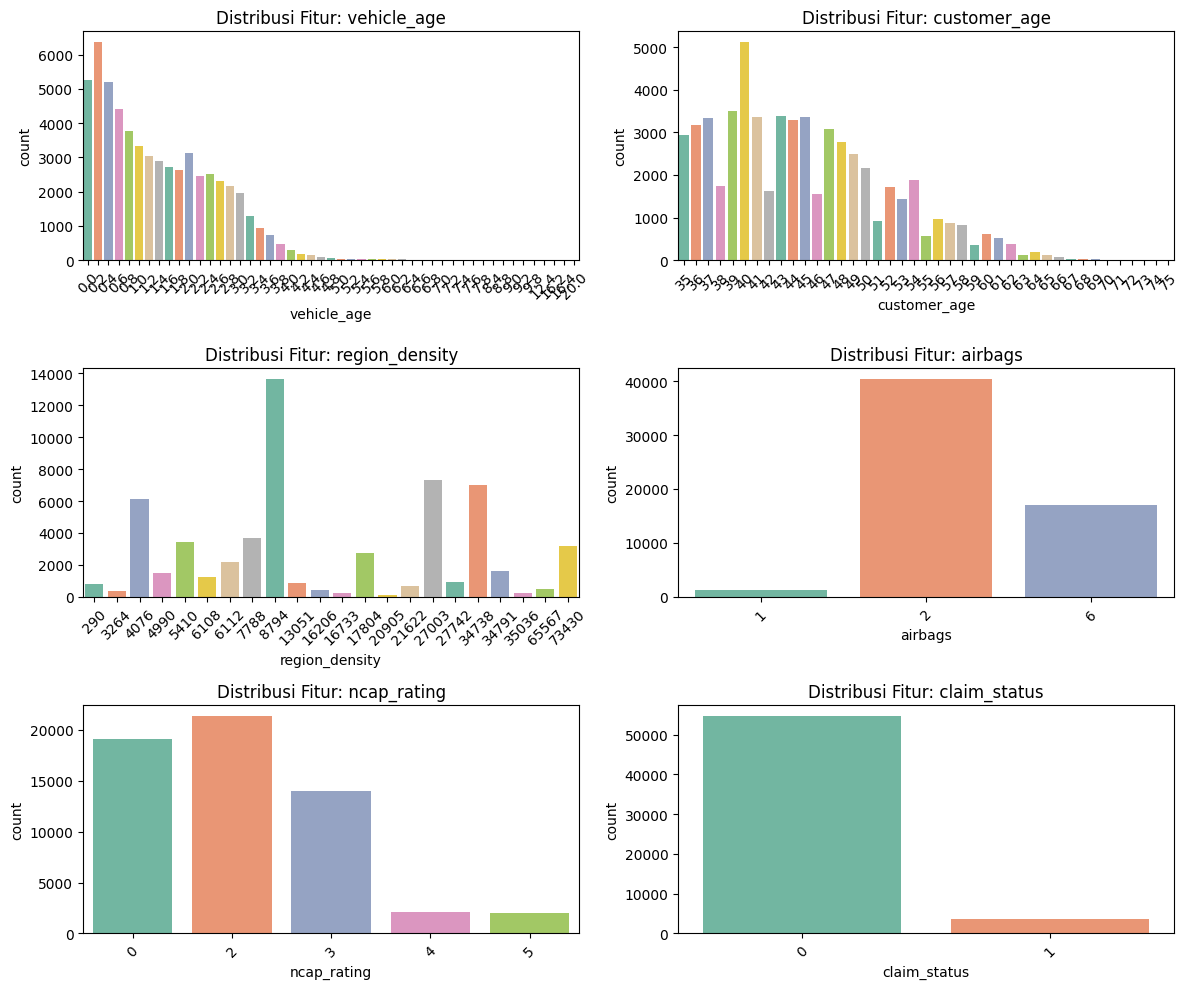

In [24]:
# Barplot Distribusi Fitur yang Berpengaruh
categorical_sample = ['vehicle_age', 'customer_age','region_density', 'airbags', 'ncap_rating', 'claim_status']

fig, axes = plt.subplots(3, 2, figsize=(12, 10))

for ax, col in zip(axes.flatten(), categorical_sample):
    sns.countplot(data=insurance, x=col, ax=ax, palette='Set2')
    ax.set_title(f'Distribusi Fitur: {col}')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


<ipython-input-20-a7fa957562f3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='claim_status', data=insurance, palette='Set2')


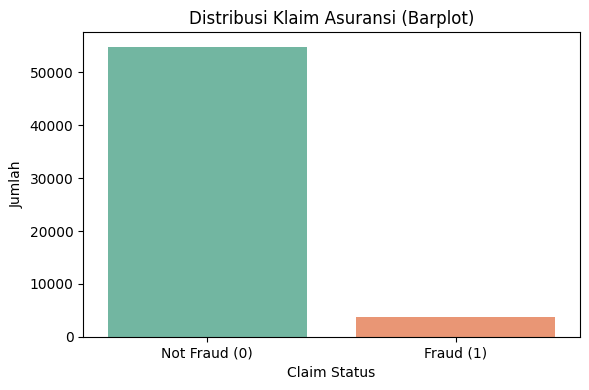

In [20]:
# Barplot Distribusi Fraud dan Not Fraud
plt.figure(figsize=(6, 4))
sns.countplot(x='claim_status', data=insurance, palette='Set2')
plt.title('Distribusi Klaim Asuransi (Barplot)')
plt.xlabel('Claim Status')
plt.ylabel('Jumlah')
plt.xticks([0, 1], ['Not Fraud (0)', 'Fraud (1)'])
plt.tight_layout()
plt.show()

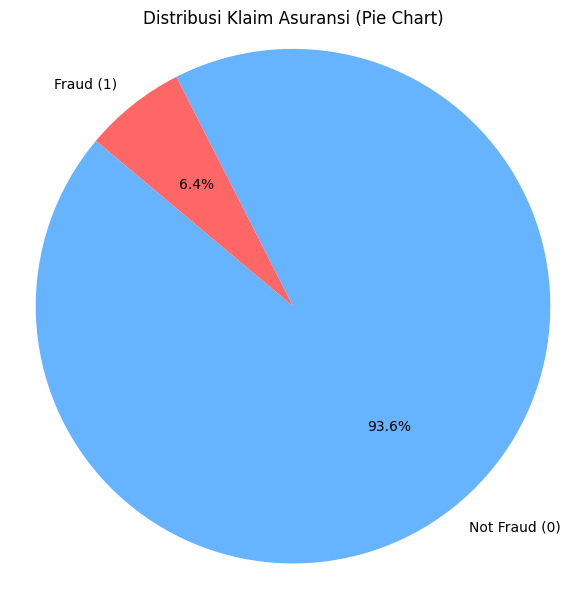

In [21]:
# Pie chart Distribusi Fraud dan Not Fraud
claim_counts = insurance['claim_status'].value_counts()
labels = ['Not Fraud (0)', 'Fraud (1)']

plt.figure(figsize=(6, 6))
plt.pie(claim_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#66b3ff', '#ff6666'])
plt.title('Distribusi Klaim Asuransi (Pie Chart)')
plt.axis('equal')
plt.tight_layout()
plt.show()


# Preparation

## Drop Kolom

In [25]:
# hapus kolom yang tidak digunakan
insurance.drop(['policy_id', 'segment', 'model', 'max_torque', 'max_power'], axis=1, inplace=True)

In [26]:
# cek kembali tipe data
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   subscription_length               58592 non-null  float64
 1   vehicle_age                       58592 non-null  float64
 2   customer_age                      58592 non-null  int64  
 3   region_code                       58592 non-null  object 
 4   region_density                    58592 non-null  int64  
 5   fuel_type                         58592 non-null  object 
 6   engine_type                       58592 non-null  object 
 7   airbags                           58592 non-null  int64  
 8   is_esc                            58592 non-null  object 
 9   is_adjustable_steering            58592 non-null  object 
 10  is_tpms                           58592 non-null  object 
 11  is_parking_sensors                58592 non-null  object 
 12  is_p

## Proses Encoding

In [27]:
#Pisahkan Binary dan Multi-Kategori
# Kolom kategorikal binary (nilai: Yes/No atau hanya 2 kategori)
binary_cols = [
    'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera',
    'rear_brakes_type', 'transmission_type','steering_type',
    'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger',
    'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering',
    'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert'
]

# Label Encoding untuk binary features
le = LabelEncoder()
for col in binary_cols:
    insurance[col] = le.fit_transform(insurance[col])

In [28]:
#One-Hot Encoding untuk kategori Nominal
# Kolom kategorikal multi-kategori (bukan binary)
multi_cat_cols = [
    'region_code', 'fuel_type', 'engine_type'
]

# Gunakan One-Hot Encoding
insurance = pd.get_dummies(insurance, columns=multi_cat_cols, drop_first=True)


In [29]:
#Cek hasil encoding
print(insurance[binary_cols].head())
print(insurance.filter(like='segment_').head())

   is_esc  is_adjustable_steering  is_tpms  is_parking_sensors  \
0       1                       1        1                   1   
1       0                       1        0                   1   
2       1                       1        1                   1   
3       0                       0        0                   1   
4       0                       1        0                   1   

   is_parking_camera  rear_brakes_type  transmission_type  steering_type  \
0                  1                 0                  0              2   
1                  1                 1                  1              0   
2                  1                 0                  0              2   
3                  0                 1                  1              2   
4                  0                 1                  1              0   

   is_front_fog_lights  is_rear_window_wiper  is_rear_window_washer  \
0                    1                     1                      1   
1   

In [30]:
# cek kembali dataset yang sudah di preprocessing
insurance.head()

,subscription_length,vehicle_age,customer_age,region_density,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,...,engine_type_1.2 L K Series Engine,engine_type_1.2 L K12N Dualjet,engine_type_1.5 L U2 CRDi,engine_type_1.5 Turbocharged Revotorq,engine_type_1.5 Turbocharged Revotron,engine_type_F8D Petrol Engine,engine_type_G12B,engine_type_K Series Dual jet,engine_type_K10C,engine_type_i-DTEC
0,9.3,1.2,41,8794,6,1,1,1,1,1,...,False,False,True,False,False,False,False,False,False,False
1,8.2,1.8,35,27003,2,0,1,0,1,1,...,False,False,False,False,False,False,False,False,False,True
2,9.5,0.2,44,8794,6,1,1,1,1,1,...,False,False,True,False,False,False,False,False,False,False
3,5.2,0.4,44,73430,2,0,0,0,1,0,...,False,False,False,False,False,True,False,False,False,False
4,10.1,1.0,56,5410,2,0,1,0,1,0,...,False,False,False,True,False,False,False,False,False,False


## Feature Scaling

In [31]:
# Fitur numerik yang akan discale
numerical_cols = [
    'subscription_length', 'vehicle_age', 'customer_age', 'region_density',
    'airbags', 'displacement', 'cylinder', 'turning_radius',
    'length', 'width', 'gross_weight', 'ncap_rating'
]

In [32]:
# Inisialisasi scaler
scaler = StandardScaler()

# Fit dan transform kolom numerik
insurance[numerical_cols] = scaler.fit_transform(insurance[numerical_cols])


In [33]:
# cek kembali fitur numerik untuk kolom numerikal
print(insurance[numerical_cols].describe())

       subscription_length   vehicle_age  customer_age  region_density  \
count         5.859200e+04  5.859200e+04  5.859200e+04    5.859200e+04   
mean          3.344615e-16 -2.053700e-16  1.250896e-16    5.208529e-17   
std           1.000009e+00  1.000009e+00  1.000009e+00    1.000009e+00   
min          -1.475271e+00 -1.223968e+00 -1.416462e+00   -1.049651e+00   
25%          -9.683623e-01 -8.713593e-01 -8.397228e-01   -7.199797e-01   
50%          -9.937533e-02 -1.661427e-01 -1.187989e-01   -5.681113e-01   
75%           1.035135e+00  7.153780e-01  6.021250e-01    4.629745e-01   
max           1.904123e+00  1.640645e+01  4.350929e+00    3.091906e+00   

            airbags  displacement      cylinder  turning_radius        length  \
count  5.859200e+04  5.859200e+04  5.859200e+04    5.859200e+04  5.859200e+04   
mean   1.952440e-17 -2.915321e-16 -2.329589e-16   -2.101056e-15  1.556495e-16   
std    1.000009e+00  1.000009e+00  1.000009e+00    1.000009e+00  1.000009e+00   
min   -1.

In [34]:
#cek tipe data setelah preprocessing
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 66 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   subscription_length                    58592 non-null  float64
 1   vehicle_age                            58592 non-null  float64
 2   customer_age                           58592 non-null  float64
 3   region_density                         58592 non-null  float64
 4   airbags                                58592 non-null  float64
 5   is_esc                                 58592 non-null  int64  
 6   is_adjustable_steering                 58592 non-null  int64  
 7   is_tpms                                58592 non-null  int64  
 8   is_parking_sensors                     58592 non-null  int64  
 9   is_parking_camera                      58592 non-null  int64  
 10  rear_brakes_type                       58592 non-null  int64  
 11  di

## Train Test Split

In [35]:
# Pisahkan fitur dan target
X = insurance.drop(columns='claim_status')
y = insurance['claim_status']

In [36]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

In [37]:
#print data latih dan data uji juga distribusi y_train
print(f"Jumlah data latih: {X_train.shape[0]}")
print(f"Jumlah data uji: {X_test.shape[0]}")
print(f"Distribusi label y_train:\n{y_train.value_counts(normalize=True)}")

Jumlah data latih: 46873
Jumlah data uji: 11719
Distribusi label y_train:
claim_status
0    0.93604
1    0.06396
Name: proportion, dtype: float64


## SMOTE

In [38]:
# Inisialisasi SMOTE
smote = SMOTE(random_state=42)

# Terapkan SMOTE hanya pada data latih
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Cek distribusi setelah SMOTE
print(y_train_smote.value_counts(normalize=True))
print(f"Jumlah data latih setelah SMOTE: {X_train_smote.shape[0]}")

claim_status
0    0.5
1    0.5
Name: proportion, dtype: float64
Jumlah data latih setelah SMOTE: 87750


# Modeling

In [39]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42)
}

results = []

# Evaluasi

In [40]:
def evaluate_model(model, name):
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]) if hasattr(model, "predict_proba") else None
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC AUC": roc_auc
    })


In [41]:
for name, model in models.items():
    evaluate_model(model, name)

results_df = pd.DataFrame(results)
print(results_df)
# print evaluasi dari modeling

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:48:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


           Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Random Forest  0.882669   0.087186  0.088000  0.087591  0.584391
1  Decision Tree  0.866456   0.087133  0.114667  0.099021  0.518444
2        XGBoost  0.926530   0.127517  0.025333  0.042269  0.637066
3       CatBoost  0.933441   0.142857  0.008000  0.015152  0.637794


# Tuning Model XGBoost

In [42]:
# Best model tuning (XGBoost)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}
grid = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='f1', cv=3, n_jobs=-1, verbose=0)
grid.fit(X_train_smote, y_train_smote)
best_model = grid.best_estimator_


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:52:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [46]:
# Evaluasi Tuning Model

# Prediksi pada data uji
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]  # untuk ROC AUC

# Hitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
roc_auc = roc_auc_score(y_test, y_proba)

# Tampilkan hasil
print("Evaluasi XGBoost setelah tuning:")
print(f"Accuracy  : {accuracy:.6f}")
print(f"Precision : {precision:.6f}")
print(f"Recall    : {recall:.6f}")
print(f"F1 Score  : {f1:.6f}")
print(f"ROC AUC   : {roc_auc:.6f}")


Evaluasi XGBoost setelah tuning:
Accuracy  : 0.921580
Precision : 0.103286
Recall    : 0.029333
F1 Score  : 0.045691
ROC AUC   : 0.646131


# Menjawab Pertanyaan Bisnis

In [27]:
# Save Pipeline
pipeline = Pipeline([('model', best_model)])
joblib.dump(pipeline, 'fraud_detector.pkl')

['fraud_detector.pkl']

### 1. Bagaimana memprediksi apakah sebuah klaim asuransi memiliki potensi risiko tinggi?


Dengan membangun model klasifikasi (claim_status: 0 atau 1) menggunakan data historis dan memprediksi apakah klaim baru tergolong risiko tinggi (1).

In [28]:
# Predict New Data
def detect_claim_risk(input_data):
    model = joblib.load('fraud_detector.pkl')
    return model.predict(input_data)

new_claim = X_test.iloc[[0]]
pred = detect_claim_risk(new_claim)
print("Prediksi risiko klaim:", "Risiko Tinggi" if pred[0] == 1 else "Aman")

Prediksi risiko klaim: Aman


Dengan membangun model klasifikasi (claim_status: 0 atau 1) menggunakan data historis dan memprediksi apakah klaim baru tergolong risiko tinggi (1).

✅ Penjelasan: Dengan model yang sudah dilatih (misalnya XGBoost), kita bisa input data baru dan model akan memberikan prediksi klaim yang berisiko tinggi.

### 2. Apa saja faktor-faktor yang mempengaruhi risiko pada klaim asuransi?

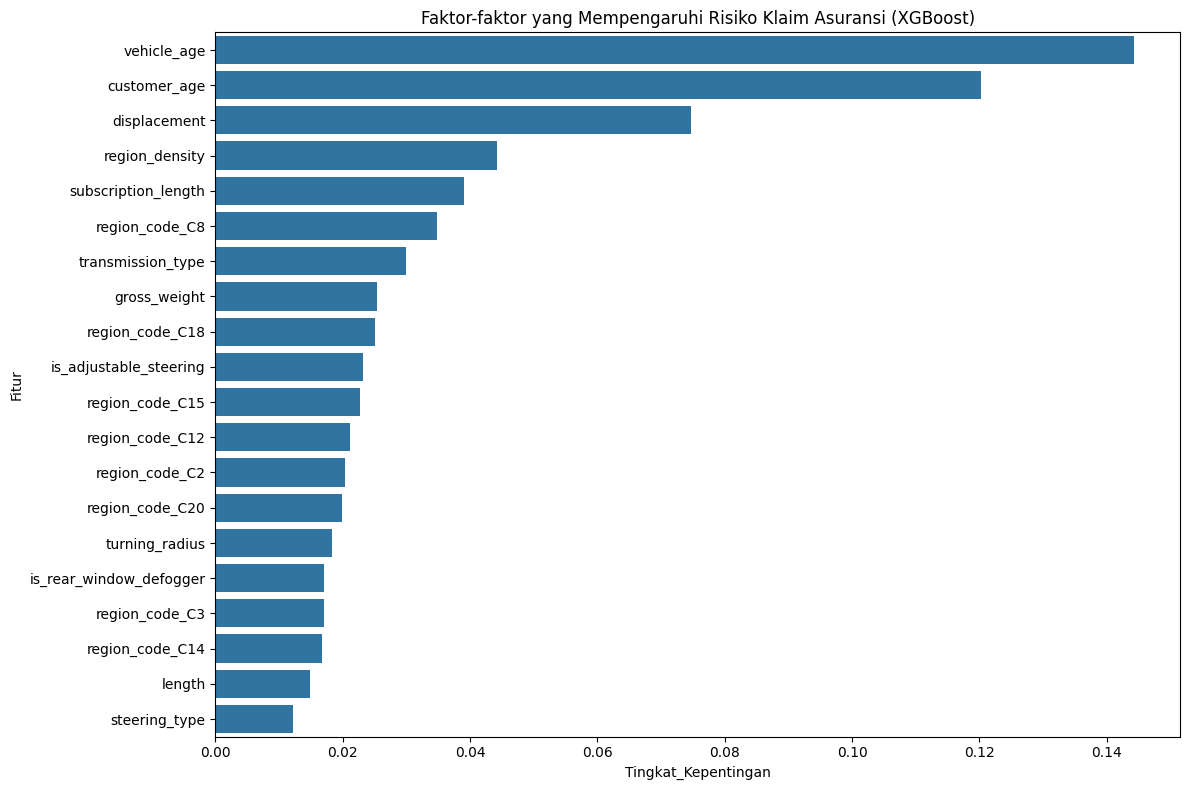

In [32]:
# Feature Importance
importances = best_model.feature_importances_
importance_df = pd.DataFrame({'Fitur': X_train.columns, 'Tingkat_Kepentingan': importances}).sort_values(by='Tingkat_Kepentingan', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=importance_df.head(20), x='Tingkat_Kepentingan', y='Fitur')
plt.title('Faktor-faktor yang Mempengaruhi Risiko Klaim Asuransi (XGBoost)')
plt.tight_layout()
plt.show()

Dengan mengevaluasi feature importance dari model seperti XGBoost atau Random Forest. Kita bisa melihat fitur mana (misalnya: vehicle_age, costumer_age, displacement, dll) yang paling berpengaruh dalam keputusan model.

### 3. Bagaimana mengotomatiskan proses deteksi klaim yang mencurigakan secara efisien?

In [33]:
# Misal pipeline preprocessing dan model
pipeline = Pipeline(steps=[
    ('model', best_model)
])

# Simpan model ke file
joblib.dump(pipeline, 'fraud_detector.pkl')

# Fungsi otomatis deteksi klaim
def detect_claim_risk(input_data):
    model = joblib.load('fraud_detector.pkl')
    prediction = model.predict(input_data)
    return prediction


In [34]:
# Misal input data baru dari sistem
incoming_claim = X_test.iloc[[0]]
hasil = detect_claim_risk(incoming_claim)

print("Deteksi otomatis klaim: ", "Risiko Tinggi" if hasil[0] == 1 else "Aman")


Deteksi otomatis klaim:  Aman


Dengan menyimpan model dalam bentuk pipeline dan membuat fungsi untuk mendeteksi secara otomatis klaim masuk baru.

✅ Penjelasan: Ini bisa dipanggil dari API/web app untuk langsung mendeteksi apakah klaim mencurigakan atau tidak secara real time.